In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [10]:
model = np.genfromtxt(
    '/Users/hombit/Documents/projects/accretion/fred/data/F_3.9571e+38/alpha_0.91436/sum.dat',
    names=True
)
obsB = np.genfromtxt(
    '/Users/hombit/Dropbox/X-ray_novae_modeling (2) (1)/data_and_plots/opt/f1_B.txt',
    names=['t','mB'],
    delimiter=', '
)
obsV = np.genfromtxt(
    '/Users/hombit/Dropbox/X-ray_novae_modeling (2) (1)/data_and_plots/opt/f1_V.txt',
    names=['t','mV'],
    delimiter=', '
)
model['t'] -= 5.17
obsB['t'] -= 52445.5
obsV['t'] -= 52445.5

AV = 1.6
AB = 1.324 * 1.6

obsB['mB'] -= AB
obsV['mV'] -= AV

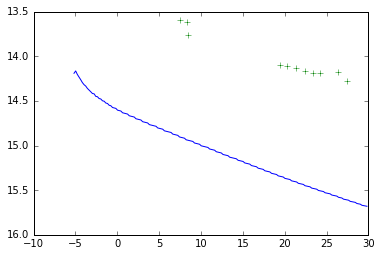

In [11]:
mV_cold = -2.5 * np.log10( 1 - (model['Rhot2Rout']-1e-5)**2. ) + 1000
# backgroundV = obsV['mV'][ obsV['t'] < -50 ].mean()
backgroundV = 16.4
mV_sum = -2.5 * np.log10(
    + np.power(10., -0.4 * model['mV'])
    + np.power(10., -0.4 * mV_cold)
    + np.power(10., -0.4 * backgroundV)
)
plt.gca().invert_yaxis()
plt.plot( model['t'], mV_sum )
plt.plot( obsV['t'], obsV['mV'], '+' )